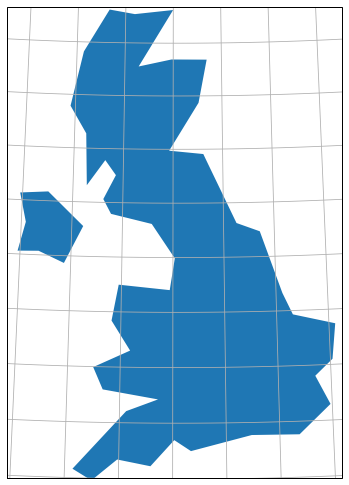

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import epl.geometry
import cartopy
import requests

# grab the Great Britain outline from a geojson hosted on github
r = requests.get("https://raw.githubusercontent.com/johan/world.geo.json/master/countries/GBR.geo.json")
gbr_shape = epl.geometry.shape(r.json()['features'][0]['geometry'], wkid=4326)

# Lets load up the Albers Equal Area projection.
lonlat_crs = cartopy.crs.PlateCarree()
albers = cartopy.crs.AlbersEqualArea(central_longitude=gbr_shape.centroid.x, central_latitude=gbr_shape.centroid.y)

fig = plt.figure(figsize=(6, 12))
ax = plt.subplot(projection=albers) # Specify projection of the map here

# When adding a geometry in latlon coordinates, specify the latlon geographic coordinate system
ax.add_geometries([gbr_shape.carto_geom], lonlat_crs)

# You can set extents in latlon, as long as you specify the projection with `crs`
ax.set_extent(gbr_shape.carto_bounds, crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)
plt.show()

wkid: 4326

xmin: -7.572168
ymin: 49.96
xmax: 1.681531
ymax: 58.635
sr {
  wkid: 4326
}



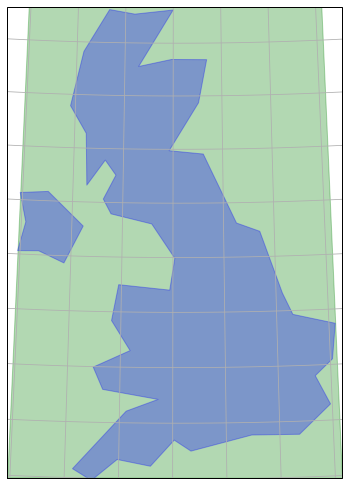

In [2]:
from epl.geometry import Polygon

print(gbr_shape.sr)

geometry_data = gbr_shape.geometry_data
envelope_data = gbr_shape.envelope_data

# print(geometry_data)
print(envelope_data)

same_gbr_shape = Polygon.import_protobuf(geometry_data)
bounds_shape = Polygon.from_envelope_data(envelope_data)

fig = plt.figure(figsize=(6, 12))
ax = plt.subplot(projection=albers) # Specify projection of the map here

# When adding a geometry in latlon coordinates, specify the latlon geographic coordinate system
ax.add_geometries([bounds_shape.carto_geom], lonlat_crs, alpha=0.3, color='green')
ax.add_geometries([same_gbr_shape.carto_geom], lonlat_crs, alpha=0.3, color='blue')

ax.set_extent(bounds_shape.carto_bounds, crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)
plt.show()

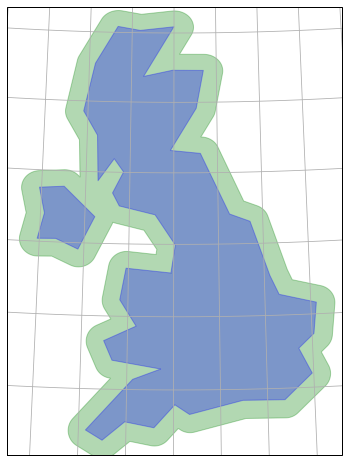

In [3]:
fig = plt.figure(figsize=(6, 12))
ax = plt.subplot(projection=albers) # Specify projection of the map here

forty_km = 40000
buffered_gbr = gbr_shape.buffer(forty_km)
# When adding a geometry in latlon coordinates, specify the latlon geographic coordinate system
ax.add_geometries([buffered_gbr.carto_geom], lonlat_crs, alpha=0.3, color='green')
ax.add_geometries([gbr_shape.carto_geom], lonlat_crs, alpha=0.3, color='blue')

ax.set_extent(buffered_gbr.carto_bounds, crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)
plt.show()

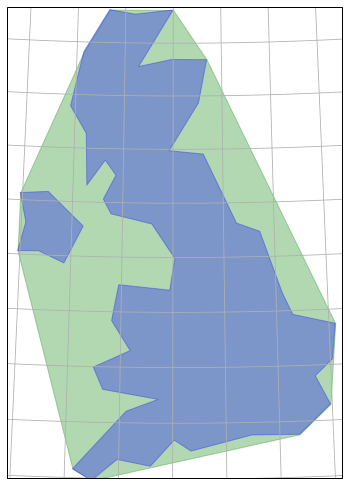

In [4]:
fig = plt.figure(figsize=(6, 12))
ax = plt.subplot(projection=albers) # Specify projection of the map here

convex_gbr = gbr_shape.convex()
# When adding a geometry in latlon coordinates, specify the latlon geographic coordinate system

ax.add_geometries([convex_gbr.carto_geom], lonlat_crs, alpha=0.3, color='green')
ax.add_geometries([gbr_shape.carto_geom], lonlat_crs, alpha=0.3, color='blue')


ax.set_extent(convex_gbr.carto_bounds, crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)
plt.show()

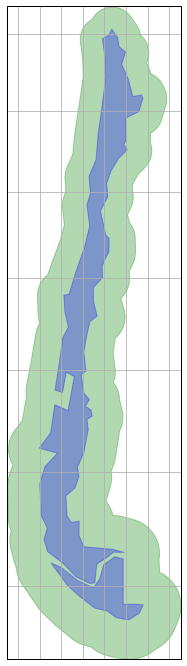

In [5]:
# grab the Chilean outline from a geojson hosted on github
r = requests.get("https://raw.githubusercontent.com/johan/world.geo.json/master/countries/CHL.geo.json")
chl_shape = epl.geometry.shape(r.json()['features'][0]['geometry'], wkid=4326)

# Lets load up the Albers Equal Area projection.
lonlat_crs = cartopy.crs.PlateCarree()
web_merc = cartopy.crs.epsg(3857)

fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(projection=web_merc) # Specify projection of the map here

geodetic_buffer = chl_shape.buffer(200000)
# When adding a geometry in latlon coordinates, specify the latlon geographic coordinate system
ax.add_geometries([geodetic_buffer.carto_geom], lonlat_crs, alpha=0.3, color='green')
ax.add_geometries([chl_shape.carto_geom], lonlat_crs, alpha=0.3, color='blue')

# You can set extents in latlon, as long as you specify the projection with `crs`
ax.set_extent(geodetic_buffer.carto_bounds, crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)
plt.show()

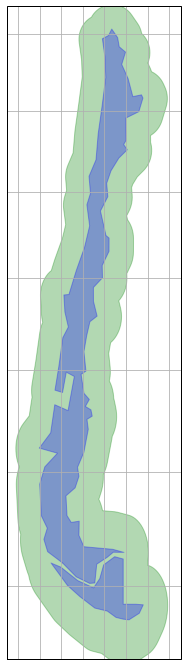

In [6]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(projection=web_merc) # Specify projection of the map here

# When adding a geometry in latlon coordinates, specify the latlon geographic coordinate system
degrees_buffer = chl_shape.s_buffer(2)
ax.add_geometries([degrees_buffer.carto_geom], lonlat_crs, alpha=0.3, color='green')
ax.add_geometries([chl_shape.carto_geom], lonlat_crs, alpha=0.3, color='blue')

# You can set extents in latlon, as long as you specify the projection with `crs`
ax.set_extent(geodetic_buffer.carto_bounds, crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)
plt.show()

In [7]:
print("square degrees (?) {}".format(chl_shape.area(geodetic=False)))
print("square degrees (?) {}".format(degrees_buffer.area(geodetic=False)))
print("square degrees (?) {}".format(geodetic_buffer.area(geodetic=False)))

print("square kilometers {}".format(chl_shape.area() / (1000**2)))
print("square kilometers {}".format(degrees_buffer.area() / (1000**2)))
print("square kilometers {}".format(geodetic_buffer.area() / (1000**2)))

square degrees (?) 86.50847108497754
square degrees (?) 288.9551967783767
square degrees (?) 308.51460621439645
square kilometers 814807.7005220815
square kilometers 2734064.0919824163
square kilometers 2889298.0589672644
